In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import os
import csv
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
df = pd.read_csv('C:\\Users\\Ivona\\Desktop\\MacedonianSignLanguage\\input\\data.csv')
X = df.image_path.values
y = df.target.values
(train_x, test_x, train_y, test_y) = (train_test_split(X, y, 
                                test_size=0.25, random_state=42))
print(f"Training on {len(train_x)} images")
print(f"Validationg on {len(test_x)} images")

Training on 9135 images
Validationg on 3045 images


In [3]:
tr_x = pd.DataFrame(train_x)
tr_x

,0
0,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
1,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
2,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
3,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
4,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
...,...
9130,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
9131,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
9132,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
9133,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...


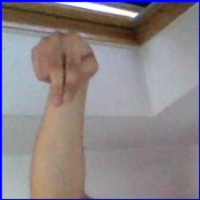

In [4]:
image1 = tr_x[0]
PIL.Image.open(image1[2]).resize((200, 200))

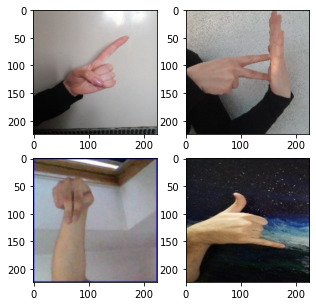

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5))

for i, slika in enumerate(train_x):
    img = plt.imread(slika)
    axi = ax[i // 2, i % 2]
    axi.imshow(img)
    if i==3:
        break


plt.show()


In [6]:
images_train = []

for i in range(0,9135):
    file_path=tr_x.iloc[i][0]
    image = Image.open(file_path)
    image_data = np.array(image)
    images_train.append(image_data)

images_train = np.array(images_train)


In [7]:
images_train[:5]

array([[[[141, 137, 126],
         [144, 140, 129],
         [142, 135, 125],
         ...,
         [212, 214, 213],
         [210, 212, 209],
         [211, 213, 210]],

        [[137, 133, 122],
         [140, 136, 125],
         [143, 136, 126],
         ...,
         [210, 212, 211],
         [208, 210, 207],
         [209, 211, 208]],

        [[140, 133, 123],
         [141, 134, 124],
         [142, 135, 125],
         ...,
         [209, 211, 210],
         [207, 209, 208],
         [209, 211, 208]],

        ...,

        [[  4,   6,   3],
         [  7,   7,   5],
         [  8,   8,   6],
         ...,
         [ 56,  64,  66],
         [ 43,  53,  54],
         [117, 129, 129]],

        [[  5,   7,   4],
         [  6,   6,   4],
         [  7,   7,   5],
         ...,
         [ 61,  66,  69],
         [ 71,  79,  81],
         [126, 134, 136]],

        [[  0,   1,   0],
         [  4,   4,   2],
         [  7,   7,   5],
         ...,
         [ 62,  66,  69],
        

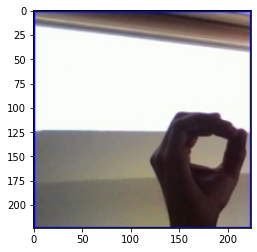

In [8]:
plt.imshow(images_train[5])

In [9]:
te_x = pd.DataFrame(test_x)
te_x

,0
0,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
1,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
2,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
3,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
4,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
...,...
3040,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
3041,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
3042,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...
3043,C:\Users\Ivona\Desktop\MacedonianSignLanguage\...


In [10]:
fi=te_x.iloc[0][0]
print(fi)

C:\Users\Ivona\Desktop\MacedonianSignLanguage\input\preprocessed_image\Prst\Prst142.jpg


In [11]:
images_test = []

for i in range(0,3045):
    file_path=te_x.iloc[i][0]
    image = Image.open(file_path)
    image_data = np.array(image)
    images_test.append(image_data)

images_test= np.array(images_test)

In [12]:
images_test[:5]

array([[[[169, 173, 172],
         [111, 115, 114],
         [114, 118, 117],
         ...,
         [ 21,  17,  16],
         [ 21,  17,  16],
         [ 20,  16,  15]],

        [[129, 133, 132],
         [156, 160, 159],
         [125, 129, 128],
         ...,
         [ 20,  16,  15],
         [ 20,  16,  15],
         [ 20,  16,  15]],

        [[134, 138, 137],
         [143, 147, 146],
         [117, 121, 120],
         ...,
         [ 21,  17,  16],
         [ 20,  16,  15],
         [ 20,  16,  15]],

        ...,

        [[155, 157, 156],
         [134, 136, 135],
         [125, 127, 126],
         ...,
         [ 26,  25,  23],
         [ 30,  29,  27],
         [ 30,  29,  27]],

        [[168, 170, 169],
         [141, 143, 142],
         [120, 122, 121],
         ...,
         [ 30,  26,  25],
         [ 28,  24,  23],
         [ 30,  26,  25]],

        [[141, 143, 142],
         [143, 145, 144],
         [127, 129, 128],
         ...,
         [ 30,  26,  25],
        

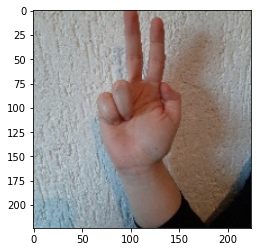

In [13]:
plt.imshow(images_test[1])

In [19]:
sliki = pd.read_csv('C:\\Users\\Ivona\\Desktop\\MacedonianSignLanguage\\Nashi\\sliki.csv')

In [20]:
sliki_df = pd.DataFrame(sliki)

In [26]:
train_images = []

for i in range(0,12):
    images=sliki_df.iloc[i][0]
    image = Image.open(images)
    image_data = np.array(image)
    train_images.append(image_data)

train_images = np.array(train_images)

In [27]:
class_names = ['A','Beskonechnost','Centar','Javanje','Kolache','LJ','Mnogu','Peperutka','Pritisok','Rob','SH','Zamenki']

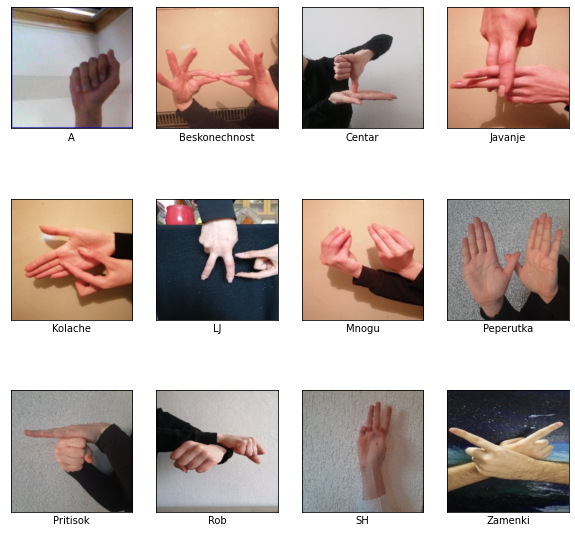

In [28]:
plt.figure(figsize=(10,10),facecolor='white')
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()

In [14]:
print(images_train.shape)
print(images_test.shape)

(9135, 224, 224, 3)
(3045, 224, 224, 3)


In [15]:
print("Train",train_y)
print("Test",test_y)

Train [48. 12. 31. ... 37. 29. 43.]
Test [37.  5. 51. ... 41. 36.  2.]


In [16]:
train_y_new = np_utils.to_categorical(train_y)
test_y_new= np_utils.to_categorical(test_y)

In [17]:
print(train_y_new.shape)
print(test_y_new.shape)

(9135, 58)
(3045, 58)


In [18]:
num_classes = test_y_new.shape[1]

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [21]:
images_train.shape

(9135, 224, 224, 3)

In [22]:
model.fit(images_train, train_y_new, validation_data=(images_test, test_y_new), epochs=2)

Epoch 1/2
286/286 [==============================] - 260s 904ms/step - loss: 4.0157 - accuracy: 0.5255 - val_loss: 0.5976 - val_accuracy: 0.8499
Epoch 2/2
286/286 [==============================] - 263s 920ms/step - loss: 0.3042 - accuracy: 0.9154 - val_loss: 0.2282 - val_accuracy: 0.9527


In [23]:
scores = model.evaluate(images_test, test_y_new, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.27%
